### Regression | Data exploration using boston housing dataset

**The Boston Housing Dataset:** is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
...
- (The target variable) MEDV - Median value of owner-occupied homes in thousand of dolares.

In [3]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import read_csv

In [4]:
boston = pd.read_csv('Boston.csv')
print(boston.head())

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  


**Creating features and target values**

We split our DataFrame: in the first line, que drop the target, and in the second we keep only the target.

In [5]:
X = boston.drop('medv', axis = 1).values
y = boston['medv'].values

As a first task, let's try to predict the price from a single feature: the average number of rooms in a block. To do this, we slice out the number of rooms column of the DataFrame `X`, which is the fifth column into the variable `X_rooms`.

In [6]:
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [7]:
# To turn them to NumPy arrays of the desire shape, we apply reshape method to keep the first dimension, 
# but add another dimension of size one to X
y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)

Now let's plot house value as functions of the number of rooms using matplot lib.

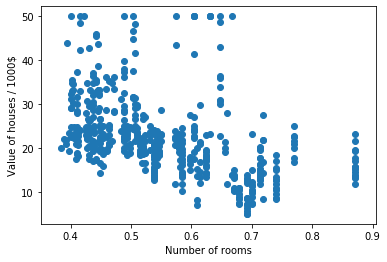

In [8]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of houses / 1000$')
plt.xlabel('Number of rooms')
# plt.rcParams["figure.figsize"] = (20,10)
plt.show()

# We can immediately see that, as one might expect, more rooms lead to higher prices. 

**Fitting a regression model**

In [9]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_rooms, y)

#We want to check out the regressions predictions over the range of the data 
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

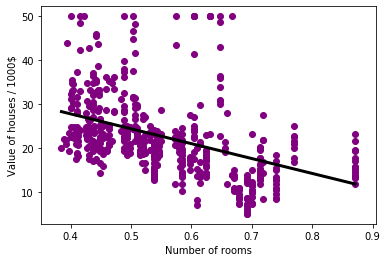

In [10]:
plt.scatter(X_rooms, y, color = 'purple')
plt.ylabel('Value of houses / 1000$')
plt.xlabel('Number of rooms')
plt.plot(prediction_space, reg.predict(prediction_space), color = 'black', linewidth = 3)
plt.show()

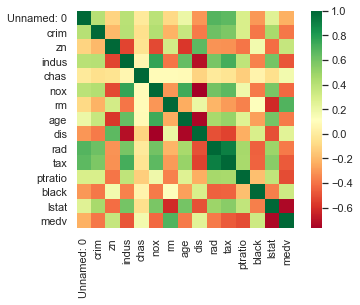

In [12]:
import seaborn as sns; sns.set()

# The heatmap was generated using Seaborn's heatmap function and 
# the following line of code, where df.corr() computes the pairwise correlation between columns

sns.heatmap(boston.corr(), square=True, cmap='RdYlGn')

**The Basics of Linear Regression**

**Regression mechanics:**
- y = ax + b
    - y = target
    - x = single feature
    - a, b = parameters of model

The question of fitting is to: How do we choose __a__ and __b__? A commom method is to define an error function for any given line and the choose the line that minimizes the error function. Such an error function is also called a __loss__ or a __cost function__.

What will our loss function be? We want the line to be as close to the actual data point as possible. For this reason, we wish to minimize the vertical distance between the fit and the data. So, we calculate residuals and we minimize the sum of the square of the residuals. This is will be out loss function and using this loss function is commonly called [Ordinary Least Square (OLS)](https://setosa.io/ev/ordinary-least-squares-regression/). Use OLS is the same as minimizing the mean squared error of the predictions on the training set.

When we call `fit` on a linear regression model in scikit-learn, it performs this OLS under the hood.

When we have two features and one target, a line is of the form 
$ y = a_1 x_1 + a_2 x_2 + b $ , so to fit a linear regression model is to specify three variables, $a_1$, $a_2$, and b. 

In higher dimensions, that is, when we have more than one or two features, a line of this form: 
$ y = a_1 x_1 + a_2 x_2 + a_3 x_3 + ... + a_n x_n + b $, 
so fitting a linear regression model is to specify a coefficient, $a_i$, for each feature, as well as the variable b. 

The scikit-learn API works exactly the same in this case: ypou pass the fit method two arrays: one containing the features, the order the target variable. 

**Linear Regression on all features**


In this code below, we are working with the all features from the Boston Housing dataset. We split it into training and test sets: we instantiate the regressor, fit it on the training set and predict on the test set. 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

#Accuracy: R^2
reg_all.score(X_test, y_test)

0.7051609808903437

We saw that, in thw world of classification, we could use accuracy as a metric of model performance. The default scoring method for linear regression is called **R-squared $(R^2)$**. Intuitively, thos metric quantifies the amount of variance in the target variable that is predicted from the feature variables. 

To compute de $R^2$, we once again apply the method score to the model and pass it two arguments: the test data and the test data target. 

Note: Train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7051609808903437
Root Mean Squared Error: 4.687149241069031


### Cross-validation

**Cross-validation motivation**



- Model perfomance is dependent on way the data is split.
- Not representative of the model's ability to generalize.
- Solution: Cross-validation! 

The data points in the test set may have some peculiarities that mean the R squared computed on it is not representative of the model's ability to generalize to unseen data. To combat this dependence on what is essentially an arbitraty split, we use a technique called cross-validation. 

![](https://assets.datacamp.com/production/repositories/628/datasets/ecdc268b67bc5f8ad76fdae3e191e3192be722af/ch2_3.020.png)

We begin by splitting the dataset into five groups or folds. The we hold out the firts fold as a test set, fit our model on the remaining four folds, predict on the test set, and compute the metric of interest. 

Next, we hold out the second fold as our test set, fit on the remaining data, predict on the test set, and compute the metric of interest. 

The simirlarly, with the third, fourth, and fifth fold. 

As a result we get five values of R squared from which we can compute statistics of interest, such as the mean and median and 95% confidence intervals. 

**Cross-validation and model performance**



As we split the data into five folds, we call this process 5-fold cross validation. If you use 10 folds, it is called 10-fold cross validation. More generally, if you use _k_ folds, it's called k-fold cross validation or _k_-fold CV.

There is, however, a trade-off as using more folds is more computationally expensive. This is because you are fittings and predicting more times. This method avoids the problem of your metric of choice being dependent on the train test split. 

In [15]:
#To perform k-fold CV in scikit-learn: 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
# We then call cross val score with the regressor, the feature data,
# and the target data as the first three positional arguments.
# We also specify the number of folds with the keyword argument, cv.
cv_results = cross_val_score(reg, X, y, cv=5)
print(cv_results)

[ 0.57280576  0.72459569  0.59122862  0.08126754 -0.20963498]


In [16]:
np.mean(cv_results)

0.3520525256628647